In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np

In [4]:
def double_exponential_smoothing(data, alpha, beta) :
  level = data[0]
  trend = 0
  forecast = [data[0]]

  for t in range(1, len(data)) :
    prev_level = level
    prev_trend = trend

    level = alpha * data[t] + (1 - alpha) * (prev_level + prev_trend)
    trend = beta * (level - prev_level) + (1 - beta) * prev_trend

    forecast_t = level + trend
    forecast.append(forecast_t)

  return forecast

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/drive/MyDrive/캡스톤디자인/nasdaq_monthly.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-01,11154.740234,11492.620117,10262.929688,11468.000000,11468.000000,101572370000
1,2022-12-01,11475.169922,11571.639648,10207.469727,10466.480469,10466.480469,100007430000
2,2023-01-01,10562.059570,11691.889648,10265.040039,11584.549805,11584.549805,106732920000
3,2023-02-01,11573.139648,12269.549805,11334.469727,11455.540039,11455.540039,99644100000
4,2023-03-01,11447.580078,12227.929688,10982.799805,12221.910156,12221.910156,120323510000
5,2023-04-01,12146.089844,12245.429688,11798.769531,12226.580078,12226.580078,90509520000
6,2023-05-01,12210.049805,13154.290039,11925.370117,12935.290039,12935.290039,101290320000
7,2023-06-01,12944.459961,13864.059570,12903.629883,13787.919922,13787.919922,107650300000
8,2023-07-01,13798.700195,14446.549805,13567.250000,14346.019531,14346.019531,96983440000
9,2023-08-01,14274.929688,14309.209961,13161.759766,14034.969727,14034.969727,110754840000


In [8]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2022-11-01,11468.000000
1,2022-12-01,10466.480469
2,2023-01-01,11584.549805
3,2023-02-01,11455.540039
4,2023-03-01,12221.910156
5,2023-04-01,12226.580078
6,2023-05-01,12935.290039
7,2023-06-01,13787.919922
8,2023-07-01,14346.019531
9,2023-08-01,14034.969727


In [22]:
train = df[0:9]
test = df[9:]

In [10]:
train, test

(         Date         Close
 0  2022-11-01  11468.000000
 1  2022-12-01  10466.480469
 2  2023-01-01  11584.549805
 3  2023-02-01  11455.540039
 4  2023-03-01  12221.910156
 5  2023-04-01  12226.580078
 6  2023-05-01  12935.290039
 7  2023-06-01  13787.919922
 8  2023-07-01  14346.019531,
           Date         Close
 9   2023-08-01  14034.969727
 10  2023-09-01  13219.320313
 11  2023-10-01  13059.469727)

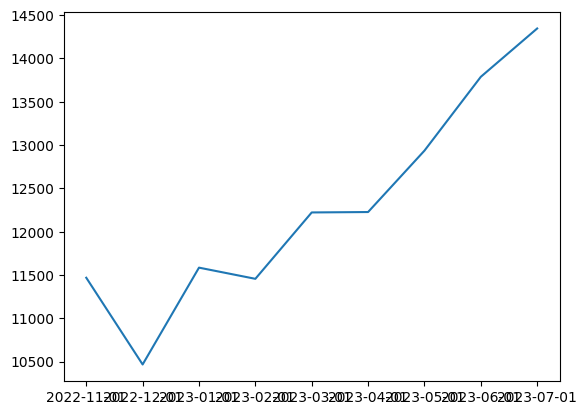

In [12]:
plt.plot(train['Date'], train['Close'])
plt.show()

In [23]:
test_arr = test['Close'].to_numpy()
test_arr

array([14034.969727, 13219.320313, 13059.469727])

In [25]:
forecast_close = double_exponential_smoothing(test_arr, 0.2, 0.2)

In [26]:
len(forecast_close)

3

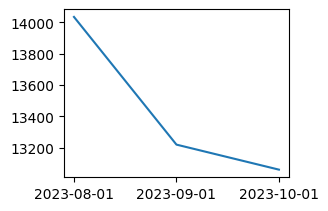

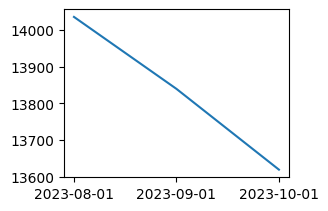

In [27]:
plt.subplot(2, 2, 1)
plt.plot(test['Date'], test['Close'])
plt.show()

plt.subplot(2, 2, 2)
plt.plot(test['Date'], forecast_close)
plt.show()